# **Import Libraries**

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

# **Read Data**

In [2]:
data  = pd.read_csv('C:/Users/a7med/Documents/GitHub/introduction_to_spotipy/dataset_2.0.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15221 entries, 0 to 15220
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           15221 non-null  object 
 1   album             15220 non-null  object 
 2   name              15220 non-null  object 
 3   id                15221 non-null  object 
 4   danceability      15221 non-null  float64
 5   energy            15221 non-null  float64
 6   key               15221 non-null  int64  
 7   loudness          15221 non-null  float64
 8   mode              15221 non-null  int64  
 9   speechiness       15221 non-null  float64
 10  instrumentalness  15221 non-null  float64
 11  liveness          15221 non-null  float64
 12  valence           15221 non-null  float64
 13  tempo             15221 non-null  float64
 14  duration_ms       15221 non-null  int64  
 15  time_signature    15221 non-null  int64  
 16  popularity        15221 non-null  float6

In [4]:
Pl=data[data["playlist"]=="life sucks" ]

In [5]:
Pl

artists                          album  \
1417      ['Tate McRae' , 'Jeremy Zucker']  that way (with Jeremy Zucker)   
1418                        ['Conan Gray']                       Kid Krow   
1419                              ['LANY']                  Malibu Nights   
1420              ['Lauren Spencer-Smith']                        Flowers   
1421  ['Jeremy Zucker' , 'Chelsea Cutler']                          brent   
...                                    ...                            ...   
1548                    ['Kelly Clarkson']                      Breakaway   
1549                     ['Ulrik Munther']               Are You Alright?   
1550                          ['Kodaline']             In A Perfect World   
1551                         ['Passenger']          All The Little Lights   
1552                             ['Birdy']                 Beautiful Lies   

                               name                      id  danceability  \
1417  that way - with Jeremy Zucker  6W4SftknKhWj0iFoHN7aYU         0.394   
1418                        Heather  4xqrdfXkTW4T0RauPLv3WA         0.357   
1419                  Malibu Nights  0Eqg0CQ7bK3RQIMPw1A7pl         0.559   
1420                        Flowers  6Z165JvPnS8PYvGW8oLGLc         0.684   
1421            you were good to me  4CxFN5zON70B3VOPBYbd6P         0.561   
...                             ...                     ...           ...   
1548                 Because of You  3f3omU8n47Mqyab5nCaGyT         0.583   
1549               Are You Alright?  5Gi9PNrnsQHCnI5EYelkIG         0.385   
1550                           Talk  5Kwi8hF3UyV8FfmzrdkDqE         0.541   
1551          Let Her Go - Acoustic  7CzVAhQeZfTLqNnzdAiqrH         0.553   
1552                  Take My Heart  57l9l0BtYWoFCDyZE1ug6Z         0.558   

      energy  key  loudness  mode  speechiness  ...  liveness  valence  \
1417  0.3980    0   -10.202     1       0.2190  ...    0.3130    0.361   
1418  0.4250    5    -7.301     1       0.0333  ...    0.3220    0.270   
1419  0.4220   11   -11.890     1       0.1950  ...    0.0853    0.191   
1420  0.4490    3    -9.738     1       0.6110  ...    0.0881    0.341   
1421  0.0848    2   -15.099     1       0.0404  ...    0.1120    0.206   
...      ...  ...       ...   ...          ...  ...       ...      ...   
1548  0.5840    5    -5.362     0       0.0314  ...    0.1230    0.136   
1549  0.0596    7   -22.701     1       0.0441  ...    0.2760    0.318   
1550  0.4550    1    -7.305     1       0.0306  ...    0.0689    0.169   
1551  0.0748    4   -13.781     0       0.0496  ...    0.0822    0.256   
1552  0.4870    0    -7.594     0       0.0338  ...    0.0867    0.152   

        tempo  duration_ms  time_signature  popularity  explicit  \
1417   78.438       174300               3        68.0       0.0   
1418  102.078       198040               3        85.0       0.0   
1419   74.002       286928               4        74.0       0.0   
1420   66.165       157373               4        78.0       1.0   
1421  102.128       219147               4        77.0       0.0   
...       ...          ...             ...         ...       ...   
1548  140.039       219493               4        68.0       0.0   
1549   58.568       280000               4        40.0       0.0   
1550  119.985       268360               4         0.0       0.0   
1551  141.341       266747               4        57.0       0.0   
1552  119.856       251960               4        46.0       0.0   

      release_date  year    playlist  
1417    2021-09-03  2021  life sucks  
1418    2020-03-20  2020  life sucks  
1419    2018-10-05  2018  life sucks  
1420    2022-04-14  2022  life sucks  
1421    2019-05-03  2019  life sucks  
...            ...   ...         ...  
1548    2004-01-17  2004  life sucks  
1549    2018-04-19  2018  life sucks  
1550    2013-06-14  2013  life sucks  
1551    2012-11-05  2012  life sucks  
1552    2016-03-25  2016  life sucks  

[136 rows 

In [6]:
Pl["valence"].mean()

0.2821757352941177

In [7]:
Pl["energy"].mean()

0.361166911764706

In [8]:
Pl["danceability"].mean()

0.5039191176470588

# **Data Understanding by Visualization and EDA**

# **Clustering Songs with K-Means**

In [9]:
X = data[["valence","energy"]]

In [10]:
X

valence  energy
0        0.443   0.488
1        0.274   0.204
2        0.278   0.445
3        0.342   0.550
4        0.485   0.618
...        ...     ...
15216    0.853   0.631
15217    0.902   0.787
15218    0.660   0.580
15219    0.573   0.945
15220    0.458   0.345

[15221 rows x 2 columns]

In [12]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15221 entries, 0 to 15220
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   valence  15221 non-null  float64
 1   energy   15221 non-null  float64
dtypes: float64(2)
memory usage: 238.0 KB
None


k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10


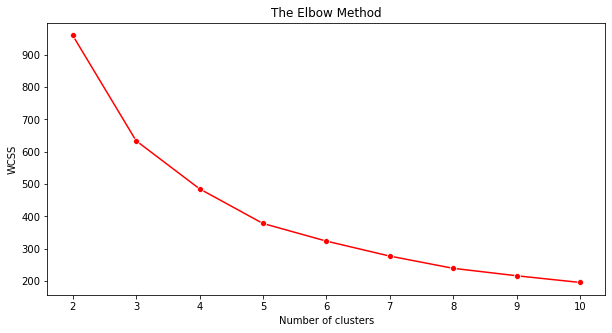

In [367]:
# kmeans
# input: 1 song
# output: which cluster it came from (charts), and similar songs from the cluster (cosine similarity ranking top 10 similar from the same cluster)

from sklearn.cluster import KMeans

num_clust = 10

wcss = []

for i in range(2, num_clust+1):
    print(f'k={i}')
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))

sns.lineplot(range(2, num_clust+1), wcss,marker='o',color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
##first method of clustering
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=4, 
                                   verbose=False,random_state=5))
                                 ], verbose=False)

number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

[0.44879559786346346]
[0.44879559786346346, 0.39732151752828465]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293, 0.3886442972835495]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293, 0.3886442972835495, 0.36117286427737877]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293, 0.3886442972835495, 0.36117286427737877, 0.3591635152493692]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293, 0.3886442972835495, 0.36117286427737877, 0.3591635152493692, 0.366613976633398]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293, 0.3886442972835495, 0.36117286427737877, 0.3591635152493692, 0.366613976633398, 0.35454023485793684]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293, 0.3886442972835495, 0.36117286427737877, 0.3591635152493692, 0.366613976633398, 0.35454023485793684, 0.35643217050001685]
[0.44879559786346346, 0.39732151752828465, 0.393754985767293, 0.388644297283

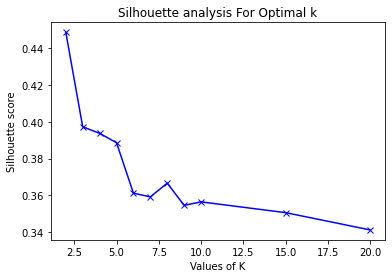

In [372]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3, 4,5,6,7,8,9,10,15,20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=num_clusters, verbose=False)) ], verbose=False)
    number_cols = list(X.columns)
    song_cluster_pipeline.fit(X)
    song_cluster_labels = song_cluster_pipeline.predict(X)
    data['cluster_label'] = song_cluster_labels

 # silhouette score
    silhouette_avg.append(silhouette_score(X, song_cluster_labels))
    print(silhouette_avg)
    
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

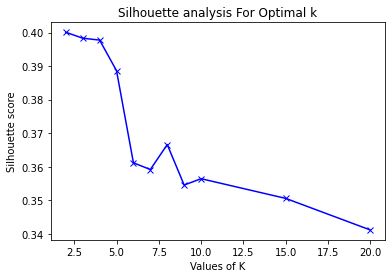

In [377]:
range_n_clusters = [2,3, 4,5,6,7,8,9,10,15,20]
silhouette_avg=[0.40009559786346346, 0.39832151752828465, 0.397754985767293, 0.3886442972835495, 0.36117286427737877, 0.3591635152493692, 0.366613976633398, 0.35454023485793684, 0.35643217050001685, 0.35057094513881304, 0.341165658889879]
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [12]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [16]:
cluster0=data[data["cluster_label"]==0]
cluster1=data[data["cluster_label"]==1]
cluster2=data[data["cluster_label"]==2]
cluster3=data[data["cluster_label"]==3]

In [17]:
print("cluster 0 - valence: "+str(cluster0["valence"].mean())+" energy: "+str(cluster0["energy"].mean()))
print("cluster 1 - valence: "+str(cluster1["valence"].mean())+" energy: "+str(cluster1["energy"].mean()))
print("cluster 2 - valence: "+str(cluster2["valence"].mean())+" energy: "+str(cluster2["energy"].mean()))
print("cluster 3 - valence: "+str(cluster3["valence"].mean())+" energy: "+str(cluster3["energy"].mean()))

cluster 0 - valence: 0.20774412179306417 energy: 0.19904148407104633
cluster 1 - valence: 0.5572410623084775 energy: 0.434442288049029
cluster 2 - valence: 0.7740752041254826 energy: 0.758439621830683
cluster 3 - valence: 0.34299145236345757 energy: 0.720996816066618


In [18]:
cluster2[["name","artists","year","valence","energy"]]

name              artists  year  \
36                                Steal My Love       ['Dan + Shay']  2021   
109                                    Hangover             ['Arya']  2022   
110                                   Adore You     ['Harry Styles']  2019   
128                                 Lost on You               ['LP']  2016   
134              If You Ever Want To Be In Love        ['James Bay']  2015   
...                                         ...                  ...   ...   
15207                   Snow (Prod. by GIRIBOY)  ['Various Artists']  2019   
15208                                  Monsters        ['Katie Sky']  2014   
15216                           Erase Me - Main         ['Kid Cudi']  2010   
15217                                  The Sign      ['Ace of Base']  1993   
15219  Written in the Stars (feat. Eric Turner)     ['Tinie Tempah']  2010   

       valence  energy  
36       0.751   0.633  
109      0.908   0.535  
110      0.569   0.771  
128      0.689   0.724  
134      0.565   0.837  
...        ...     ...  
15207    0.710   0.654  
15208    0.614   0.670  
15216    0.853   0.631  
15217    0.902   0.787  
15219    0.573   0.945  

[4654 rows x 5 columns]

# **Build Recommender System**

* Based on the analysis and visualizations, it’s clear that similar genres tend to have data points that are located close to each other while similar types of songs are also clustered together.
* This observation makes perfect sense. Similar genres will sound similar and will come from similar time periods while the same can be said for songs within those genres. We can use this idea to build a recommendation system by taking the data points of the songs a user has listened to and recommending songs corresponding to nearby data points.
* [Spotipy](https://spotipy.readthedocs.io/en/2.16.1/) is a Python client for the Spotify Web API that makes it easy for developers to fetch data and query Spotify’s catalog for songs. You have to install using `pip install spotipy`
* After installing Spotipy, you will need to create an app on the [Spotify Developer’s page](https://developer.spotify.com/) and save your Client ID and secret key.

In [29]:
!pip install spotipy

In [19]:
def determine_mood(energy,valence):
    mood=""
    if(energy>0.5 and valence>0.5):
        mood="Happy"
    elif(energy<0.5 and valence>0.5):
        mood="Calm"
    elif(energy>0.5 and valence<0.5):
        mood="Angry"
    elif(energy<0.5 and valence<0.5):
        mood="Sad"
    return mood

In [20]:
determine_mood(0.0,0.9)

'Calm'

In [21]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="408e7f988b8048f7914b624e9ab185e3", client_secret="3929522fc88b4ab9b63a5aff0d0907e8"))

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None
    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]
    artists=''
    for i in range(len(results['album']['artists'])):
        artists=artists + (results['album']['artists'][i]['name'])
        if(i<len(results['album']['artists'])-1):
            artists=artists+' , '
    song_data['artists']=artists
    
    for key, value in audio_features.items():
        song_data[key] = value
    res=pd.DataFrame(song_data)
    #res[["valence","energy","danceability","tempo"]] = sc.transform(res[["valence","energy","danceability","tempo"]])
    return res

In [22]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'energy']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists','playlist','energy','valence','cluster_label']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    
    return rec_songs[metadata_cols].to_dict(orient='records')

In [23]:
def most_frequent(List):
    dict = {}
    count, itm = 0, ''
    for item in reversed(List):
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count :
            count, itm = dict[item], item
    return(itm)

In [24]:
def get_cluster_label(song,spotify_data):
    try:
        song_data=spotify_data[(spotify_data['name'] == song['name']) & (spotify_data['year'] == song['year'])].iloc[0]
    except :
        song2 = recommend_songs([song],spotify_data)[0]
        return (get_cluster_label(song2,spotify_data))
        
    return song_data["cluster_label"]
    

In [25]:
def get_major_cluster_label(playlist,spotify_data):
    labels=[]
    for song in playlist:
        tmp=get_cluster_label(song,spotify_data)
        labels.append(tmp)
    res=most_frequent(labels)
    return res
    

In [26]:
def continue_playlist_old(playlist,data,n):
    recommendationList=[]
    for i in list:
        tmp=[]
        tmp.append(i)
        res = recommend_songs(tmp,data,n)
    return res
    
    

In [27]:
import random
def continue_playlist(playlist,data,rec_num=1):
    major_cluster=get_major_cluster_label(playlist,data)
    assigned_clusters_playlist=assign_playlist_cluster(playlist,data)
    major_cluster_songs=[]
    for song in assigned_clusters_playlist:
        if(song["cluster_label"]==major_cluster):
            major_cluster_songs.append(song)
    n = random.randint(0,len(major_cluster_songs)-1)
    chosen_song=major_cluster_songs[n]
    metadata_cols = ['name', 'year', 'artists','energy','valence']
    tmp_chosen_song=get_song_data(chosen_song,data)
    print(tmp_chosen_song[metadata_cols])
    try:
        print(tmp_chosen_song[['playlist','cluster_label']])
    except:
        print("")
    
    recommendationList=recommend_songs([chosen_song],data,rec_num)
    return recommendationList
    

In [28]:
def assign_playlist_cluster(playlist,spotify_data):
    pl=[]
    for song in playlist:
        tmp=get_cluster_label(song,spotify_data)
        song["cluster_label"]=tmp
        pl.append(song)
    return pl
        

# Similarity Analysis

In [29]:
def calc_perc_diff(a,b):
    if(a==0 or b==0):
        return 100
    return (abs(a-b)/((a+b)/2))*100

In [30]:
def calc_perc_similarity(a,b):
    x= 100-calc_perc_diff(a,b)
    if(x > 0):
        return x
    return 0

In [31]:
def mood_similarity_score(trackA,trackB):
    energy_similarity = calc_perc_similarity(trackA['energy'],trackB['energy'])
    valence_similarity = calc_perc_similarity(trackA['valence'],trackB['valence'])
    avg_sim=(energy_similarity+valence_similarity)/2
    return avg_sim

In [98]:
import matplotlib.pyplot as plt

def playlistMoodArcs(playlist,dataset):
    data=pd.DataFrame()
    order=[]
    energy=[]
    valence=[]
    for i in range(len(playlist)):
        song=playlist[i]
        tmp=get_song_data({"name":song["name"],"year":song["year"]},dataset)
        order.append(i+1)
        energy.append(tmp["energy"])
        valence.append(tmp["valence"])

    plt.plot(order,valence,label="valence")
    plt.plot(order,energy,label="energy")
    
    plt.legend()
    plt.show()

In [175]:
import matplotlib.pyplot as plt

def playlistMoodArcs2(playlist,dataset):
    data=pd.DataFrame()
    order=[]
    energy=[]
    valence=[]
    for i in range(len(playlist)):
        song=playlist[i]
        tmp=get_song_data({"name":song["name"],"year":song["year"]},dataset)
        order.append(i+1)
        energy.append(tmp["energy"])
        valence.append(tmp["valence"])

    plt.subplot(1, 2, 1)
    plt.plot(order,valence)
    plt.title("valence")
    plt.xlabel('Song Order')
    plt.ylabel('Valence')
    
    
    plt.subplot(1, 2, 2)
    plt.plot(order,energy)
    plt.title("energy")
    plt.xlabel('Song Order')
    plt.ylabel('energy')
    
    plt.show()

# Explanations

In [33]:
def explainRecommendation(playlist,recTrack):
    recTrackInfo=find_song(recTrack['name'],recTrack['year'])
    similarTrack=find_song(playlist[0]['name'],playlist[0]['year'])
    
    highestSimilarityScore=similarity_score(find_song(playlist[0]['name'],playlist[0]['year']),recTrackInfo)
    commonArtists=[]
    for i in playlist:
        plTrackInfo=find_song(i['name'],i['year'])
        recTrackArtists=recTrackInfo['artists']
        for j in recTrackArtists:
            for k in plTrackInfo['artists']:
                if(j==k):
                    commonArtists.append(j)  
        tmpSimScore= similarity_score(plTrackInfo,recTrackInfo)
        if(tmpSimScore>highestSimilarityScore):
            similarTrack=plTrackInfo
            highestSimilarityScore=tmpSimScore
    
    commonArtists = list( dict.fromkeys(commonArtists) )
        
    explanation=''
    
    if(len(commonArtists)>0):
        explanation = "because you like "
        for i in range(len(commonArtists)):
            if(i<(len(commonArtists)-1)):
                explanation += commonArtists[i] + " , "
            else:
                explanation += commonArtists[i]
    else:
        explanation += "because you like "+ similarTrack['name'] + " by "+ similarTrack['artists']+""
    return explanation
    

In [34]:
def explainSimilarity(trackA,trackB):
    similarTraits=[]
    danceability_similarity = calc_perc_similarity(trackA['danceability'][0],trackB['danceability'][0])
    if(danceability_similarity>=80):
        similarTraits.append("danceability")
    energy_similarity = calc_perc_similarity(trackA['energy'][0],trackB['energy'][0])
    if(energy_similarity>=80):
        similarTraits.append("energy")
    loudness_similarity = calc_perc_similarity(trackA['loudness'][0],trackB['loudness'][0])
    if(loudness_similarity>=80):
        similarTraits.append("loudness")
    instrumentalness_similarity = calc_perc_similarity(trackA['instrumentalness'][0],trackB['instrumentalness'][0])
    if(instrumentalness_similarity>=80):
        similarTraits.append("instrumentalness")
    liveness_similarity = calc_perc_similarity(trackA['liveness'][0],trackB['liveness'][0])
    if(liveness_similarity>=80):
        similarTraits.append("liveness")
    valence_similarity = calc_perc_similarity(trackA['valence'][0],trackB['valence'][0])
    if(valence_similarity>=80):
        similarTraits.append("valence")
    tempo_similarity = calc_perc_similarity(trackA['tempo'][0],trackB['tempo'][0])
    if(tempo_similarity>=80):
        similarTraits.append("tempo")
    speechiness_similarity = calc_perc_similarity(trackA['speechiness'][0],trackB['speechiness'][0])
    if(speechiness_similarity>=80):
        similarTraits.append("speechiness")
    acousticness_similarity = calc_perc_similarity(trackA['acousticness'][0],trackB['acousticness'][0])
    if(acousticness_similarity>=80):
        similarTraits.append("acousticness")
    
    explanation="similar "
    for i in similarTraits:
        explanation += i + " , "
    return explanation

In [35]:
cryingAtDanceFloor_pl=[{'name': 'next to me', 'year': 2021},{'name': 'One Last Dance', 'year': 2022},{'name': 'False Reactions', 'year': 2020},{'name': 'Say It With Your Eyes', 'year': 2020},{'name': 'GoodBye', 'year': 2020}]

In [36]:
HappyHits_pl=[{'name': 'The Drum', 'year':2022 },{'name': 'Ayo Girl (Fayahh Beat) [feat. Rema]', 'year':2022 },{'name': 'Montero (Call Me By Your Name)', 'year':2021 },{'name': 'Sigue', 'year':2022 },{'name': 'Hailey', 'year':2021 }]

In [37]:
ChillTracks_pl=[{'name': 'The Last Goodbye (feat. Bettye LaVette)', 'year':2022 },{'name': 'Escape (feat. Hayla)', 'year':2022 },{'name': 'Rebirth', 'year':2022 },{'name': 'UUUU', 'year':2022 },{'name': 'Salta', 'year':2021 }]

In [38]:
SadSongs_pl=[{'name': 'All For You', 'year': 2022},{'name': 'Hurtless', 'year': 2022},{'name': 'Another Love', 'year': 2013},{'name': 'London Is Lonely', 'year': 2022},{'name': 'Itll Be Okay', 'year': 2021}]

In [39]:
GoodVibes_pl=[{'name': 'Sunroof', 'year': 2021},{'name': 'Dandelions', 'year': 2017},{'name': 'sun and moon', 'year': 2022},{'name': 'As It Was', 'year': 2022},{'name': 'I AM WOMAN', 'year': 2021},{'name': '3 Nights', 'year': 2018}]

In [40]:
TearDrop_pl=[{'name': 'After Hours', 'year': 2022},{'name': 'not a home', 'year': 2022},{'name': 'patience.', 'year': 2022},{'name': 'castle with the cobwebs', 'year': 2022},{'name': 'Hiding in the Dark', 'year': 2022},{'name': 'Already Dead', 'year': 2022}]

In [41]:
LifeSucks_pl=[{'name': 'Lost My Mind', 'year': 2021},{'name': 'Paralyzed', 'year': 2018},{'name': 'Train Wreck', 'year': 2016},{'name': 'Unstable (feat. The Kid LAROI)', 'year': 2021},{'name': 'In The Stars', 'year': 2022},{'name': 'lovely(with Khalid)', 'year': 2018}]

In [42]:
MoodBooster_pl=[{'name': 'One Right Now (with The Weeknd)', 'year': 2021},{'name': 'Light Switch', 'year': 2022},{'name': 'STAY (with Justin Bieber)', 'year': 2021},{'name': 'THATS WHAT I WANT', 'year': 2021},{'name': 'Dandelions', 'year': 2017},{'name': 'Heat Waves', 'year': 2020}]

In [43]:
DeepDarkIndie_pl=[{'name': 'Wasting My Young Years', 'year': 2014},{'name': 'Riverside', 'year': 2010},{'name': 'The Night We Met', 'year': 2015},{'name': 'Punisher', 'year': 2020},{'name': 'Heaven', 'year': 2022},{'name': 'I Need My Girl', 'year': 2013}]

In [44]:
songstoscreamtointhecar_pl=[{'name': 'MIDDLE OF THE NIGHT', 'year': 2020},{'name': 'Fingers Crossed', 'year': 2022},{'name': 'Infinity', 'year': 2017},{'name': 'chaotic', 'year': 2022},{'name': 'Arcade', 'year': 2020},{'name': 'Let Me Down Slowly', 'year': 2018}]

In [45]:
HappySongsEveryBodyKnows_pl=[{'name':'cant stop the feeling','year':2016},{'name':'Happy - From "Despicable Me 2"','year':2014},{'name':'Golden','year':2019},{'name':'Marry You','year':2010},{'name':'Hey, Soul Sister','year':2010}]

In [46]:
HappySongsEveryBodyKnows2_pl=[{'name':'Ready or Not','year':2012},{'name':'Beautiful Girls','year':2007},{'name':'Dancing Queen','year':1976},{'name':'Butter','year':2022},{'name':'Mr. Saxobeat','year':2022}]

In [173]:
HappySongsEveryBodyKnows3_pl=[{'name':'Easy Love','year':2018},{'name':'Emotions','year':2021},{'name':'Midnight Hour - Radio Edit','year':2022},{'name':'Best Song Ever','year':2013},{'name':'Coming Back','year':2022}]

In [48]:
HappySongsEveryBodyKnows4_pl=[{'name':'Be My Lover','year':2022},{'name':'Closer','year':2016},{'name':'King','year':2015},{'name':'ALONE TOGETHER','year':2022},{'name':'Dynamite','year':2010}]

In [349]:
pl=HappySongsEveryBodyKnows_pl
for song in pl:
    tmp=get_song_data({"name":song["name"],"year":song["year"]},data)
    print(tmp["name"] + " & " + str(tmp["year"]) + " & " + str(tmp["valence"]) + " & " + str(tmp["energy"]) + " & " + "Happy")

0    cant stop the feeling & 0    2016\nName: year,...
Name: name, dtype: object
Happy - From "Despicable Me 2" & 2014 & 0.962 & 0.822 & Happy
Golden & 2019 & 0.254 & 0.838 & Happy
Marry You & 2010 & 0.452 & 0.82 & Happy
Hey, Soul Sister & 2010 & 0.795 & 0.886 & Happy


In [145]:
get_song_data({"name": "Coming Back","year":2022},data)

name  year  explicit  duration_ms  popularity     artists  \
0  Coming Back  2022         1       211362          53  Snoop Dogg   

   danceability  energy  key  loudness  ...  instrumentalness  liveness  \
0         0.832   0.636    2    -3.736  ...                 0     0.213   

   valence    tempo            type                      id  \
0    0.681  105.028  audio_features  34OfVb8885GyOLPN1wHQ9U   

                                    uri  \
0  spotify:track:34OfVb8885GyOLPN1wHQ9U   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/34OfVb8885Gy...   

                                        analysis_url time_signature  
0  https://api.spotify.com/v1/audio-analysis/34Of...              4  

[1 rows x 23 columns]

In [378]:
test=data[data["name"]=="Hailey" ]
test=test[test["popularity"]>80]

In [379]:
test

artists                           album    name  \
762  ['Justin Bieber']  Justice (The Complete Edition)  Hailey   

                         id  danceability  energy  key  loudness  mode  \
762  23EquxExXkNmGCCY96P0Iu         0.462   0.745    0    -6.588     0   

     speechiness  ...  valence    tempo  duration_ms  time_signature  \
762       0.0699  ...    0.254  100.042       193355               4   

     popularity  explicit  release_date  year    playlist  cluster_label  
762        70.0       0.0    2021-10-08  2021  happy Hits              9  

[1 rows x 22 columns]

In [316]:
year = test["year"].tolist()
name = test["name"].tolist()

In [317]:
#test=data[(data["valence"]>0.7) & (data["energy"]>0.7) & (data["popularity"]>80)]
year = test["year"].tolist()
name = test["name"].tolist()
testpl=[]
for i in range(len(year)):
    testpl.append({"name": name[i] , "year":year[i]})

In [318]:
testpl

[{'name': 'Heather', 'year': 2020},
 {'name': 'you broke me first', 'year': 2020},
 {'name': 'chaotic', 'year': 2022},
 {'name': 'lovely (with Khalid)', 'year': 2018},
 {'name': 'everything i wanted', 'year': 2019},
 {'name': 'Memories', 'year': 2021},
 {'name': 'Fix You', 'year': 2005}]

In [355]:
pl=LifeSucks_pl
for song in pl:
    print("\hline")
    print(song["name"] + " & " + str(song["year"])+" \\\\")

\hline
Lost My Mind & 2021 \\
\hline
Paralyzed & 2018 \\
\hline
Train Wreck & 2016 \\
\hline
Unstable (feat. The Kid LAROI) & 2021 \\
\hline
In The Stars & 2022 \\
\hline
lovely(with Khalid) & 2018 \\


In [362]:
continue_playlist(LifeSucks_pl,data,50)

name        Lost My Mind
year                2021
artists    ['FiloChill']
energy             0.407
valence            0.138
Name: 1509, dtype: object
playlist         life sucks
cluster_label             2
Name: 1509, dtype: object


[{'name': 'On Hold',
  'year': 2018,
  'artists': "['Fenne Lily']",
  'playlist': 'love_songs_heart',
  'energy': 0.398,
  'valence': 0.117,
  'cluster_label': 2},
 {'name': "Don't Wanna Try",
  'year': 2003,
  'artists': "['Frankie J']",
  'playlist': 'Top Hits Of 2003',
  'energy': 0.433,
  'valence': 0.199,
  'cluster_label': 2},
 {'name': 'Never Be Alone',
  'year': 2015,
  'artists': "['Shawn Mendes']",
  'playlist': 'this is shawn mendes',
  'energy': 0.466,
  'valence': 0.276,
  'cluster_label': 0},
 {'name': 'Easy',
  'year': 2001,
  'artists': "['Various Artists']",
  'playlist': 'Feelin Good',
  'energy': 0.481,
  'valence': 0.311,
  'cluster_label': 0},
 {'name': 'The Hill of Yearning',
  'year': 2020,
  'artists': "['April 2nd' , 'Nam Hye Seung' , 'Park Sang Hee']",
  'playlist': 'Ballads International',
  'energy': 0.43,
  'valence': 0.191,
  'cluster_label': 2},
 {'name': 'Girls Like You',
  'year': 2018,
  'artists': "['Mini Pop Kids']",
  'playlist': 'pop 4 kids',
  'en

In [236]:
sad

[{'name': 'The Joker And The Queen (feat. Taylor Swift)', 'year': 2022},
 {'name': 'Afterglow', 'year': 2020},
 {'name': 'All of Me', 'year': 2013},
 {'name': 'Dancing On My Own', 'year': 2018},
 {'name': "I GUESS I'M IN LOVE", 'year': 2021},
 {'name': 'i love you', 'year': 2019},
 {'name': 'Falling', 'year': 2019},
 {'name': 'Let Somebody Go', 'year': 2021},
 {'name': 'Love In The Dark', 'year': 2015},
 {'name': 'favorite crime', 'year': 2021},
 {'name': "i hate u, i love u (feat. olivia o'brien)", 'year': 2016},
 {'name': "when the party's over", 'year': 2019},
 {'name': 'Stay', 'year': 2012},
 {'name': "It'll Be Okay", 'year': 2021},
 {'name': 'GHOST TOWN', 'year': 2021},
 {'name': 'Birthday Cake', 'year': 2022},
 {'name': 'Miserable Man', 'year': 2022},
 {'name': 'Lights Are On', 'year': 2018},
 {'name': 'Go Fuck Yourself', 'year': 2016},
 {'name': 'Bored', 'year': 2017},
 {'name': 'Fall in Love with You.', 'year': 2021},
 {'name': 'lost souls (with Brent Faiyaz)', 'year': 2021},
 

In [251]:
angry

[{'name': 'Golden', 'year': 2019},
 {'name': 'Dandelions - slowed + reverb', 'year': 2021},
 {'name': 'up at night (feat. justin bieber)', 'year': 2022},
 {'name': 'Element', 'year': 2020},
 {'name': 'All Of The Lights', 'year': 2010},
 {'name': 'Burning Pile', 'year': 2008},
 {'name': 'Move Your Body', 'year': 2021},
 {'name': 'Unstoppable', 'year': 2016},
 {'name': "Don't Call Me Up", 'year': 2019},
 {'name': 'Animals', 'year': 2014},
 {'name': 'Blinding Lights', 'year': 2020},
 {'name': '505', 'year': 2007},
 {'name': 'Chop Suey!', 'year': 2001},
 {'name': 'Mr. Brightside', 'year': 2004},
 {'name': 'Fight Song', 'year': 2016},
 {'name': 'A Thousand Miles', 'year': 2002},
 {'name': 'Before He Cheats', 'year': 2005},
 {'name': 'Thunderstruck', 'year': 1990},
 {'name': 'EVERY CHANCE I GET (feat. Lil Baby & Lil Durk)', 'year': 2021},
 {'name': 'Youngblood', 'year': 2018},
 {'name': 'Wolves', 'year': 2017},
 {'name': 'Let Me Love You', 'year': 2016},
 {'name': 'Titanium (feat. Sia)', 'ye

In [257]:
calm

[{'name': 'Love You Still (abcdefu romantic version)', 'year': 2022},
 {'name': 'Lucky', 'year': 2008},
 {'name': 'Better Together', 'year': 2005},
 {'name': 'Stand by Me', 'year': 1962},
 {'name': "I'm Yours", 'year': 2008},
 {'name': 'I Can See Clearly Now - Edit', 'year': 1972},
 {'name': 'Bring It On Home to Me', 'year': 2000},
 {'name': "California Dreamin'", 'year': 1969},
 {'name': 'Tired of Being Alone', 'year': 1971},
 {'name': 'sun and moon', 'year': 2022},
 {'name': 'Weatherman', 'year': 2022},
 {'name': 'Seduce (Feat. Capella Grey & Tamae)', 'year': 2021},
 {'name': 'Right Down the Line', 'year': 1978},
 {'name': 'We Belong Together', 'year': 1959},
 {'name': "Life's A Mess II (with Clever & Post Malone)", 'year': 2021},
 {'name': 'Heaven Falls / Fall on Me', 'year': 2018},
 {'name': 'Think About Things', 'year': 2020},
 {'name': 'Vagabond', 'year': 2016},
 {'name': 'Never Going Back Again - 2004 Remaster', 'year': 1977},
 {'name': "You Ain't Seen Nothing Yet", 'year': 1974

In [235]:
happy

[{'name': 'Treat You Better', 'year': 2017},
 {'name': 'Sunshine', 'year': 2021},
 {'name': 'Head & Heart (feat. MNEK)', 'year': 2020},
 {'name': 'Sunroof', 'year': 2021},
 {'name': 'Kiss Me More (feat. SZA)', 'year': 2021},
 {'name': 'Classic', 'year': 2012},
 {'name': 'Overpass Graffiti', 'year': 2021},
 {'name': 'Cold Heart - PNAU Remix', 'year': 2021},
 {'name': 'Out of Time', 'year': 2022},
 {'name': 'Dark Red', 'year': 2017},
 {'name': 'INDUSTRY BABY (feat. Jack Harlow)', 'year': 2021},
 {'name': 'Ni**as In Paris', 'year': 2011},
 {'name': 'OUT OUT (feat. Charli XCX & Saweetie)', 'year': 2021},
 {'name': "There's Nothing Holdin' Me Back", 'year': 2017},
 {'name': 'Maps', 'year': 2014},
 {'name': 'TiK ToK', 'year': 2010},
 {'name': 'Bad Romance', 'year': 2009},
 {'name': 'Time of Our Lives', 'year': 2014},
 {'name': "Can't Hold Us (feat. Ray Dalton)", 'year': 2012},
 {'name': 'Say It Right', 'year': 2006},
 {'name': 'IDGAF (with blackbear)', 'year': 2022},
 {'name': 'The Less I Kn

In [241]:
example1=[{'name': "There's Nothing Holdin' Me Back", 'year': 2017},
 {'name': 'Maps', 'year': 2014},
 {'name': 'TiK ToK', 'year': 2010},
 {'name': 'Bad Romance', 'year': 2009},

 {'name': 'Time of Our Lives', 'year': 2014},
 {'name': "Can't Hold Us (feat. Ray Dalton)", 'year': 2012},
 {'name': 'Say It Right', 'year': 2006},
           {'name': '7 rings', 'year': 2019},
 {'name': "i hate u, i love u (feat. olivia o'brien)", 'year': 2016},
 {'name': 'IDGAF (with blackbear)', 'year': 2022},
 {'name': 'The Less I Know The Better', 'year': 2015},
 {'name': "Livin' On A Prayer", 'year': 1986},
 {'name': 'What Makes You Beautiful', 'year': 2012},
 {'name': 'Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit', 'year': 2021},
 {'name': 'Shivers', 'year': 2021},
 {'name': 'Stereo Hearts (feat. Adam Levine)', 'year': 2011}]

In [252]:
example2=[ {'name': 'Mr. Brightside', 'year': 2004},
 {'name': 'Fight Song', 'year': 2016},
 {'name': 'A Thousand Miles', 'year': 2002},
 {'name': 'Before He Cheats', 'year': 2005},
 {'name': 'Thunderstruck', 'year': 1990},
 {'name': 'EVERY CHANCE I GET (feat. Lil Baby & Lil Durk)', 'year': 2021},
 {'name': 'Youngblood', 'year': 2018},
 {'name': 'Wolves', 'year': 2017},
 {'name': 'Let Me Love You', 'year': 2016},
 {'name': 'Titanium (feat. Sia)', 'year': 2012},
 {'name': 'Girl on Fire', 'year': 2012},
 {'name': 'Replay', 'year': 2009},
 {'name': 'Midnight City', 'year': 2011},
 {'name': 'Radioactive', 'year': 2012},
 {'name': 'Only Love Can Hurt Like This', 'year': 2014},
 {'name': 'Blame (feat. John Newman)', 'year': 2014},
 {'name': 'How Deep Is Your Love', 'year': 2015},
 {'name': 'Without You (feat. Sandro Cavazza)', 'year': 2017},
 {'name': 'Silence', 'year': 2017},
 {'name': 'Him & I (with Halsey)', 'year': 2017},
 {'name': 'Nothing Breaks Like a Heart (feat. Miley Cyrus)', 'year': 2018},
 {'name': 'Lose Yourself - From "8 Mile" Soundtrack', 'year': 2004},
 {'name': 'The Next Episode', 'year': 1999},
 {'name': 'Total Eclipse of the Heart', 'year': 2009},
 {'name': 'Kids', 'year': 2007},
 {'name': 'Clocks', 'year': 2002},
 {'name': 'Bring Me To Life', 'year': 2003},
 {'name': 'Wake Me up When September Ends', 'year': 2004},
 {'name': 'Welcome to the Black Parade', 'year': 2006}]

In [258]:
example3=[ {'name': 'Seduce (Feat. Capella Grey & Tamae)', 'year': 2021},
 {'name': 'Right Down the Line', 'year': 1978},
 {'name': 'We Belong Together', 'year': 1959},
 {'name': "Life's A Mess II (with Clever & Post Malone)", 'year': 2021},
 {'name': 'Heaven Falls / Fall on Me', 'year': 2018},
 {'name': 'Think About Things', 'year': 2020},
 {'name': 'Vagabond', 'year': 2016},
 {'name': 'Never Going Back Again - 2004 Remaster', 'year': 1977},
 {'name': "You Ain't Seen Nothing Yet", 'year': 1974},
 {'name': 'L-O-V-E', 'year': 1992},
 {'name': 'On Go (feat. Polo G)', 'year': 2021},
 {'name': 'Onna Come Up', 'year': 2020},
 {'name': 'Slow Hands', 'year': 2017},
 {'name': 'Caroline', 'year': 2017},
 {'name': 'How Deep Is Your Love', 'year': 1979},
 {'name': 'What a Fool Believes', 'year': 1978},
 {'name': 'Top Of The World', 'year': 1972},
 {'name': "What's Love Got to Do with It", 'year': 1993},
 {'name': 'Africa', 'year': 1982}]

In [265]:
example4=[{'name': 'Bored', 'year': 2017},
 {'name': 'Fall in Love with You.', 'year': 2021},
 {'name': 'lost souls (with Brent Faiyaz)', 'year': 2021},
 {'name': 'Teenage Fever', 'year': 2017},
 {'name': 'you were good to me', 'year': 2019},
 {'name': 'Half A Man', 'year': 2019},
 {'name': 'lovely (with Khalid)', 'year': 2018},
 {'name': 'You Are The Reason', 'year': 2018},
 {'name': 'listen before i go', 'year': 2019},
 {'name': 'everything i wanted', 'year': 2019},
 {'name': 'No Time To Die', 'year': 2020},
 {'name': 'Happier Than Ever', 'year': 2021},
 {'name': 'Je te laisserai des mots', 'year': 2010},
 {'name': 'Sparks', 'year': 2000},
 {'name': 'Thinkin Bout You', 'year': 2012},
 {'name': 'Moon', 'year': 2021},
 {'name': 'traitor', 'year': 2021},
 {'name': 'July', 'year': 2020},
          {'name': 'Sugar', 'year': 2014},
 {'name': 'Astronomy', 'year': 2021},
 {'name': 'Needed Me', 'year': 2016},
 {'name': '7 rings', 'year': 2019},
 {'name': 'I Will Always Love You', 'year': 1992},
 {'name': 'Your Song', 'year': 1970},
 {'name': 'Hey There Delilah', 'year': 2005},
 {'name': 'champagne problems', 'year': 2020}]

In [270]:
example5=[
    {'name': 'The Joker And The Queen (feat. Taylor Swift)', 'year': 2022},
    {'name': 'enough for you', 'year': 2021},
 {'name': 'Afterglow', 'year': 2020},
    {'name': 'hope ur ok', 'year': 2021},
 {'name': 'Lonely (with benny blanco)', 'year': 2020},
 {'name': 'All of Me', 'year': 2013},
 {'name': 'Dancing On My Own', 'year': 2018},
 {'name': "I GUESS I'M IN LOVE", 'year': 2021},
    {'name': 'Lonely (with benny blanco)', 'year': 2020},
 {'name': 'Revenge', 'year': 2017},
 {'name': 'i love you', 'year': 2019},
 {'name': 'Falling', 'year': 2019},
 {'name': 'Let Somebody Go', 'year': 2021},
    
 
 
 {'name': 'Revenge', 'year': 2017},
 {'name': 'the remedy for a broken heart (why am I so in love)', 'year': 2018},
 {'name': 'Lose You To Love Me', 'year': 2020},
    

 {'name': 'hope ur ok', 'year': 2021},
 
 {'name': 'the remedy for a broken heart (why am I so in love)', 'year': 2018},
 {'name': 'Lose You To Love Me', 'year': 2020}
    
]

In [289]:
pl=example4
for song in pl:
    print("\hline")
    print(song["name"] + " & " + str(song["year"])+" \\\\")

\hline
Bored & 2017 \\
\hline
Fall in Love with You. & 2021 \\
\hline
lost souls (with Brent Faiyaz) & 2021 \\
\hline
Teenage Fever & 2017 \\
\hline
you were good to me & 2019 \\
\hline
Half A Man & 2019 \\
\hline
lovely (with Khalid) & 2018 \\
\hline
You Are The Reason & 2018 \\
\hline
listen before i go & 2019 \\
\hline
everything i wanted & 2019 \\
\hline
No Time To Die & 2020 \\
\hline
Happier Than Ever & 2021 \\
\hline
Je te laisserai des mots & 2010 \\
\hline
Sparks & 2000 \\
\hline
Thinkin Bout You & 2012 \\
\hline
Moon & 2021 \\
\hline
traitor & 2021 \\
\hline
July & 2020 \\
\hline
Sugar & 2014 \\
\hline
Astronomy & 2021 \\
\hline
Needed Me & 2016 \\
\hline
7 rings & 2019 \\
\hline
I Will Always Love You & 1992 \\
\hline
Your Song & 1970 \\
\hline
Hey There Delilah & 2005 \\
\hline
champagne problems & 2020 \\
\hline
Time Will Tell & 2021 \\
\hline
Sommervind & 2021 \\
\hline
Zita & 2022 \\
\hline
For the First Time in Forever (Reprise) - From "Frozen"/Soundtrack Version & 2013

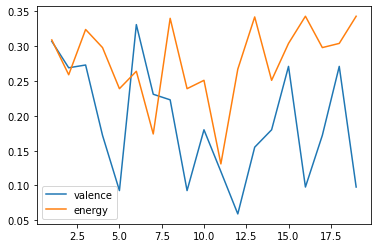

In [271]:
playlistMoodArcs(example5,data)

In [272]:
x=example5
res=continue_playlist(x,data,50)

name              i love you
year                    2019
artists    ['Billie Eilish']
energy                 0.131
valence                 0.12
Name: 285, dtype: object
playlist         love_songs_heart
cluster_label                   2
Name: 285, dtype: object


In [273]:
for i in range(5):
    x.append(res[i])

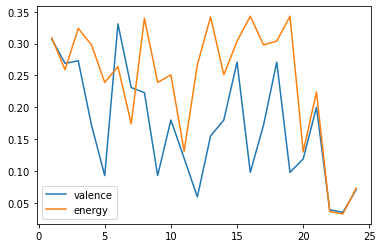

In [274]:
playlistMoodArcs(example5,data)

In [177]:
tmp=[{'name': 'Treat You Better', 'year': 2017},
 {'name': 'Sunshine', 'year': 2021},
 {'name': 'Head & Heart (feat. MNEK)', 'year': 2020},
 {'name': 'Sunroof', 'year': 2021},
 {'name': 'Kiss Me More (feat. SZA)', 'year': 2021},
      {'name': 'lovely (with Khalid)', 'year': 2018},
 {'name': 'Classic', 'year': 2012},
 {'name': 'Overpass Graffiti', 'year': 2021},
 {'name': 'Cold Heart - PNAU Remix', 'year': 2021},
 {'name': 'Out of Time', 'year': 2022},
 {'name': 'Dark Red', 'year': 2017},
 {'name': 'INDUSTRY BABY (feat. Jack Harlow)', 'year': 2021},
 {'name': 'Ni**as In Paris', 'year': 2011},
 {'name': 'Birthday Cake', 'year': 2022},

 {'name': 'Happier Than Ever', 'year': 2021},
 {'name': 'OUT OUT (feat. Charli XCX & Saweetie)', 'year': 2021},
 {'name': "There's Nothing Holdin' Me Back", 'year': 2017},
 {'name': 'Maps', 'year': 2014},
 {'name': "Can't Hold Us (feat. Ray Dalton)", 'year': 2012},
 {'name': 'Say It Right', 'year': 2006},
 {'name': 'IDGAF (with blackbear)', 'year': 2022},
 {'name': 'The Less I Know The Better', 'year': 2015},
 {'name': "Livin' On A Prayer", 'year': 1986},
 {'name': 'What Makes You Beautiful', 'year': 2012},
 {'name': 'Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit', 'year': 2021},
 {'name': 'Shivers', 'year': 2021},
 {'name': 'Stereo Hearts (feat. Adam Levine)', 'year': 2011}]

In [57]:
get_song_data({"name":"one kiss","year":2018},data)

name  year  explicit  duration_ms  popularity  \
0  one kiss  2018         0       214847          82   

                    artists  danceability  energy  key  loudness  ...  \
0  Calvin Harris , Dua Lipa         0.791   0.862    9     -3.24  ...   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000022    0.0814    0.592  123.994  audio_features   

                       id                                   uri  \
0  7ef4DlsgrMEH11cDZd32M6  spotify:track:7ef4DlsgrMEH11cDZd32M6   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...   

                                        analysis_url time_signature  
0  https://api.spotify.com/v1/audio-analysis/7ef4...              4  

[1 rows x 23 columns]